In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import signal
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import glob

import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [26]:
def diff(sub,activity,cam,trial):

    df = pd.read_csv("D:\ML\FYP\Dataset\\New_Dataset\\New\\"+sub+"\Outputs\\"+activity+"_Angles_MC_T"+trial+".csv")  # Replace with the actual file name

    df1 = pd.read_csv("D:\ML\FYP\Dataset\\New_Dataset\\New\\"+sub+"\Outputs\\"+activity+"_Angles_Cam_" + cam+"_"+"T"+trial+".csv")  # Replace with the actual file name

    time_values_to_find = list(df1['Time'])

    selected_rows = df[df['Time'].isin(time_values_to_find)]
    # print(df1['Time'])
    # selected_rows.to_csv("test.csv",index=False)
    ans=[]
    cols=list(df1.columns)[2:]
    for col in cols:
        list1 = list(df1[col])
        list2 = list(selected_rows[col])

        result_array = np.abs((np.array(list1) - np.array(list2))/np.array(list2))
        result_list = result_array.tolist()
        ans.append(result_list)

    ans.insert(0,list(df1['Time']))
    cols.insert(0,'Time')
    df_dict=dict(zip(cols,ans))
    df=pd.DataFrame(df_dict)
    df.to_csv("D:\ML\FYP\Dataset\\New_Dataset\\New\\"+sub+"\Outputs\\"+activity+"_Angles_Cam_" + cam+"_"+"T"+trial+'differences.csv',index=False)




In [27]:

def plot(sub,activity,cam,trial):

    with PdfPages(sub+'_'+activity+'_Cam_'+cam+'_Trial'+ trial+'.pdf') as pdf:


        cols=['left_foot_ankle_knee','right_foot_ankle_knee','right_ankle_knee_hip','left_ankle_knee_hip','right_knee_hip_shoulder','left_knee_hip_shoulder','right_hip_shoulder_elbow','left_hip_shoulder_elbow','right_shoulder_elbow_wrist','left_shoulder_elbow_wrist']

        for col in cols:
            if col != 'Time':
                df=pd.read_csv("D:\ML\FYP\Dataset\\New_Dataset\\New\\"+sub+"\Outputs\\"+activity+"_Angles_Cam_" + cam+"_"+"T"+trial+'differences.csv')  
                x = df['Time']
                y = df[col]
            

                # Find crests (local maxima)
                crests, _ = find_peaks(y)

                # Find troughs (local minima)
                troughs, _ = find_peaks(-y)

                # Get the top 3 crests based on y values
                top_crests_indices = sorted(crests, key=lambda i: y[i], reverse=True)[:3]

                # Get the top 3 troughs based on y values
                top_troughs_indices = sorted(troughs, key=lambda i: y[i])[:3]

                # Create subplots
                fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 5),gridspec_kw={'wspace': 0.1})

                # Plot the original signal on the first subplot
                ax1.plot(x, y)
                ax1.plot(x[top_crests_indices], y[top_crests_indices], 'ro',label='Crest')
                ax1.plot(x[top_troughs_indices], y[top_troughs_indices], 'gx',label='Trough')
                ax1.set_xlabel('Time')
                ax1.set_ylabel(col)
                ax1.set_title('Deviation-' + col)
                ax1.legend()

                for crest_index in top_crests_indices:
                    ax1.text(x[crest_index] + 0.1, y[crest_index], f'({x[crest_index]:.2f}, {y[crest_index]:.2f})',
                            ha='left', va='center', color='red')

                for trough_index in top_troughs_indices:
                    ax1.text(x[trough_index] + 0.1, y[trough_index], f'({x[trough_index]:.2f}, {y[trough_index]:.2f})',
                            ha='left', va='center', color='green')

                # Create a table with values on the second subplot
                table_data = [['Index', 'Time', " ".join(col.split('_')).title()],
                            ['Crest 1', f'{x[top_crests_indices[0]]:.2f}', f'{y[top_crests_indices[0]]:.2f}'],
                            ['Crest 2', f'{x[top_crests_indices[1]]:.2f}', f'{y[top_crests_indices[1]]:.2f}'],
                            ['Crest 2', f'{x[top_crests_indices[2]]:.2f}', f'{y[top_crests_indices[2]]:.2f}'],

                            ['Trough 1', f'{x[top_troughs_indices[0]]:.2f}', f'{y[top_troughs_indices[0]]:.2f}'],
                            ['Trough 2', f'{x[top_troughs_indices[1]]:.2f}', f'{y[top_troughs_indices[1]]:.2f}'],
                            ['Trough 3', f'{x[top_troughs_indices[2]]:.2f}', f'{y[top_troughs_indices[2]]:.2f}']]

                table = ax2.table(cellText=table_data, loc='center', colWidths=[0.2, 0.2, 0.2], cellLoc='center')

                table.auto_set_font_size(False)
                table.set_fontsize(9)
                table.scale(1,2)
                ax2.axis('off')
                plt.tight_layout()
                pdf.savefig()
                plt.show()


C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


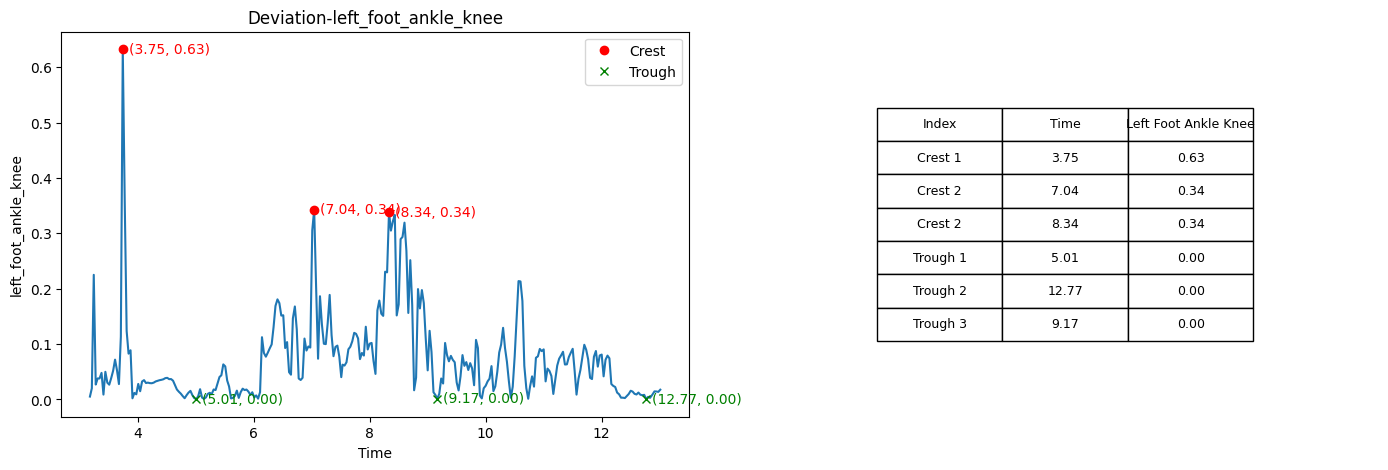

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


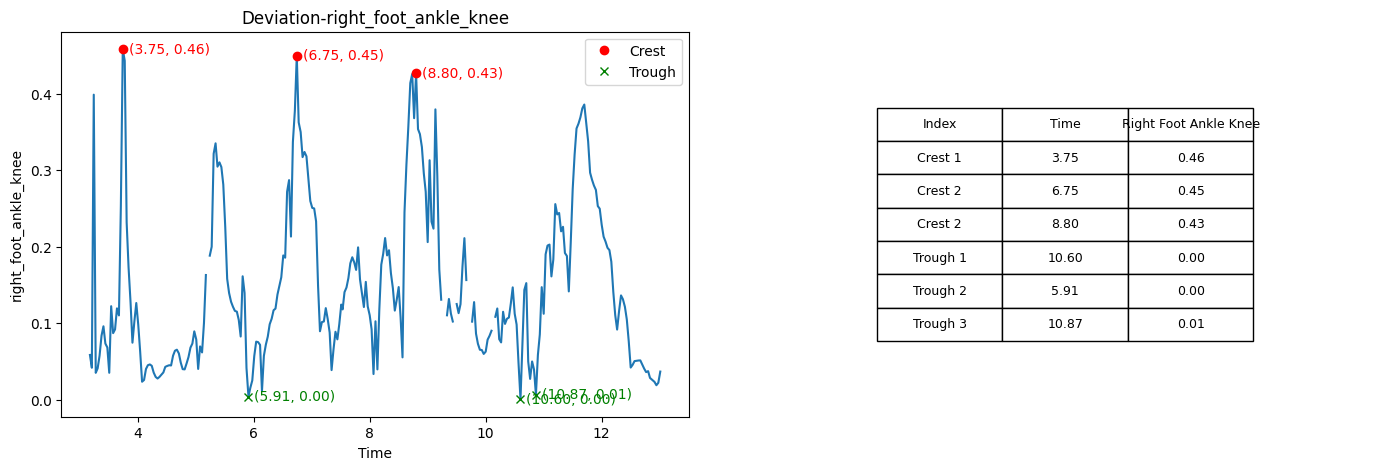

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


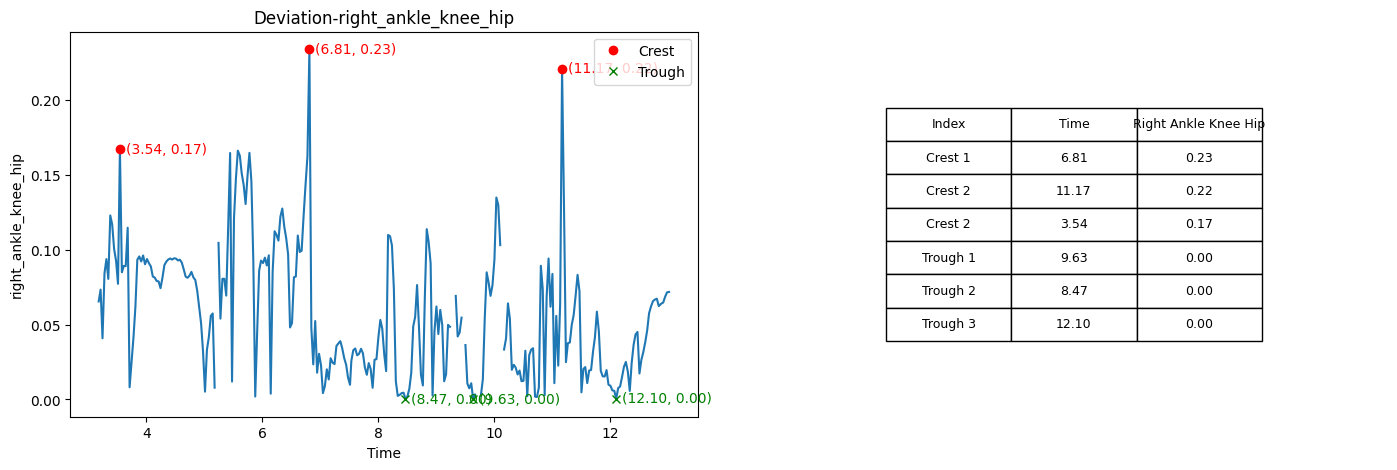

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


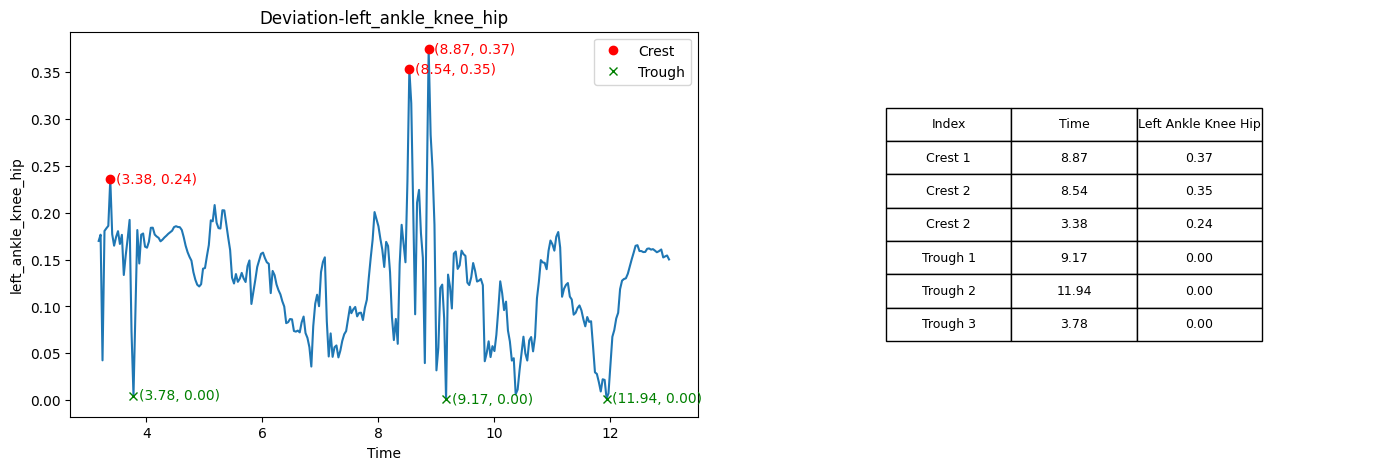

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


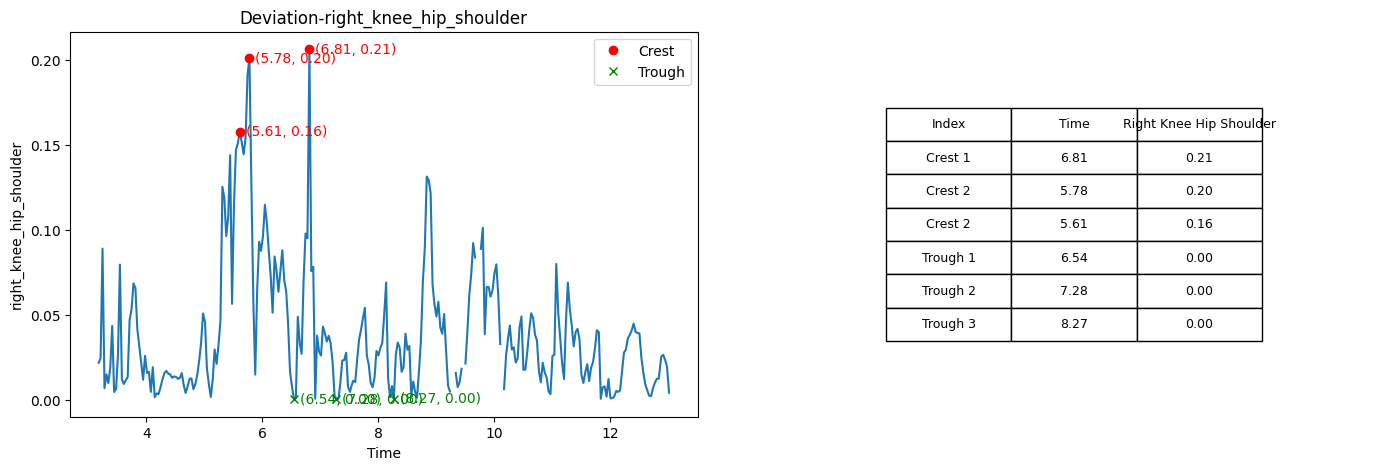

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


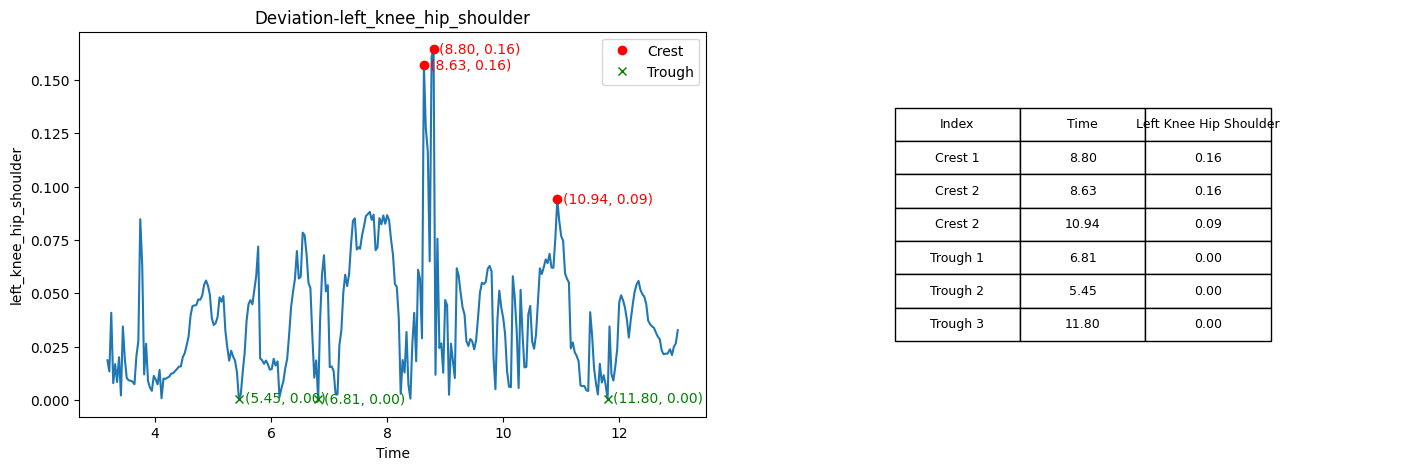

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


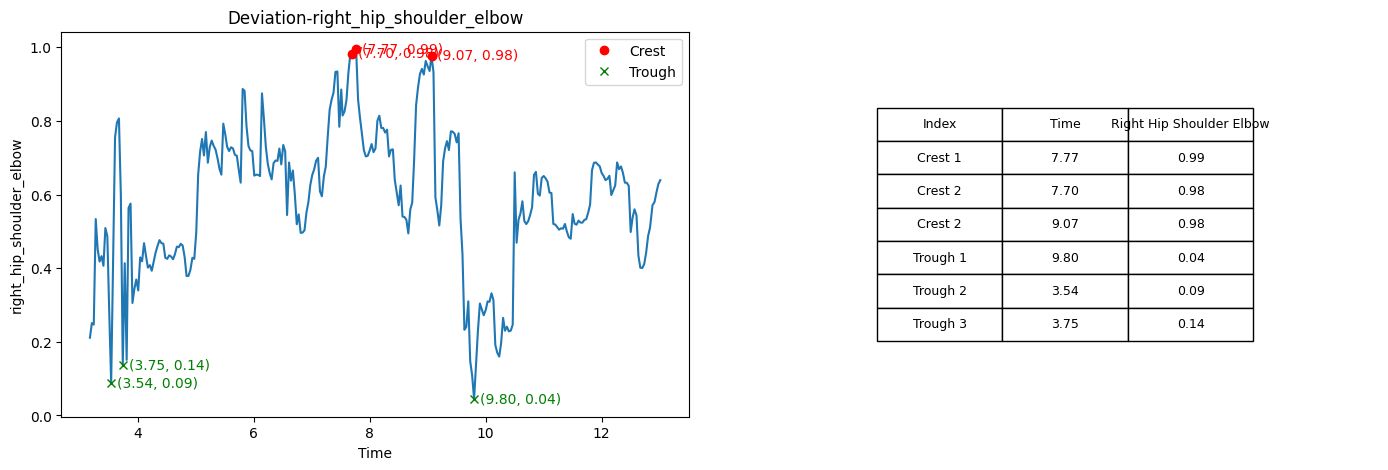

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


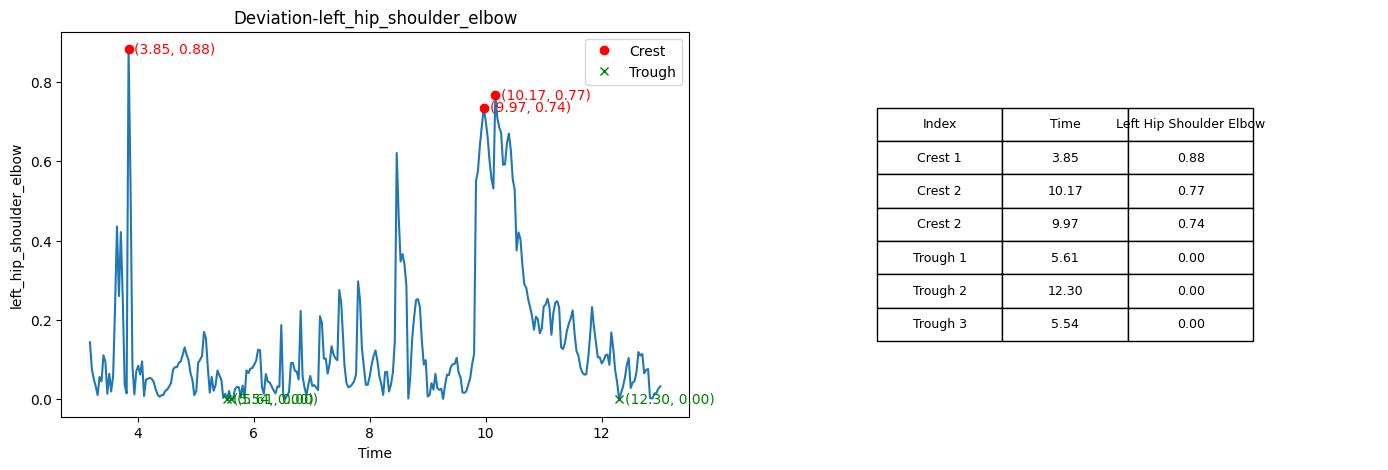

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


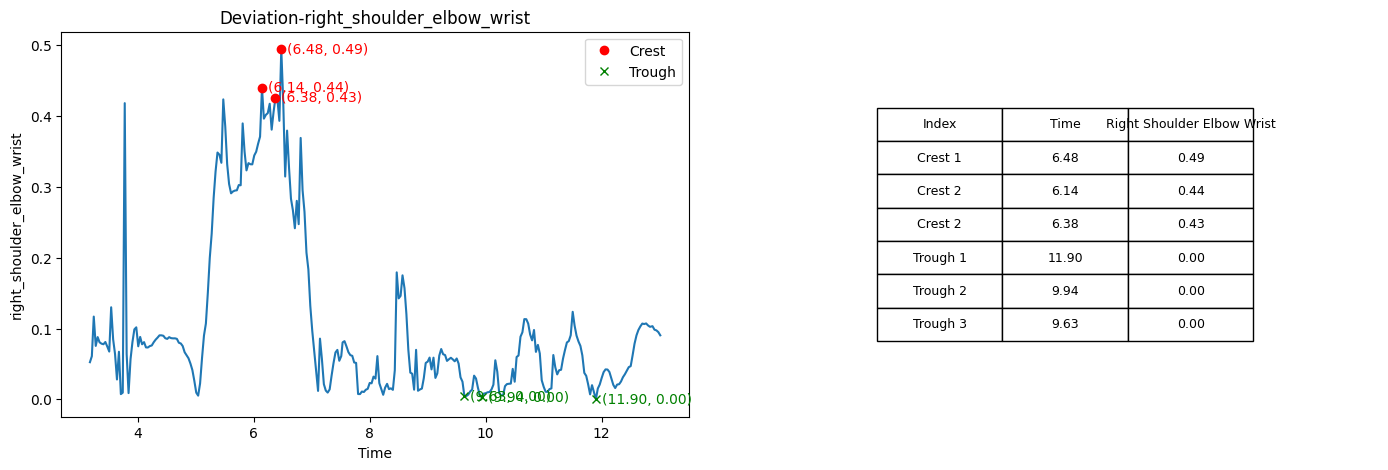

C:\Users\bhuva\AppData\Local\Temp\ipykernel_18896\1101885706.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


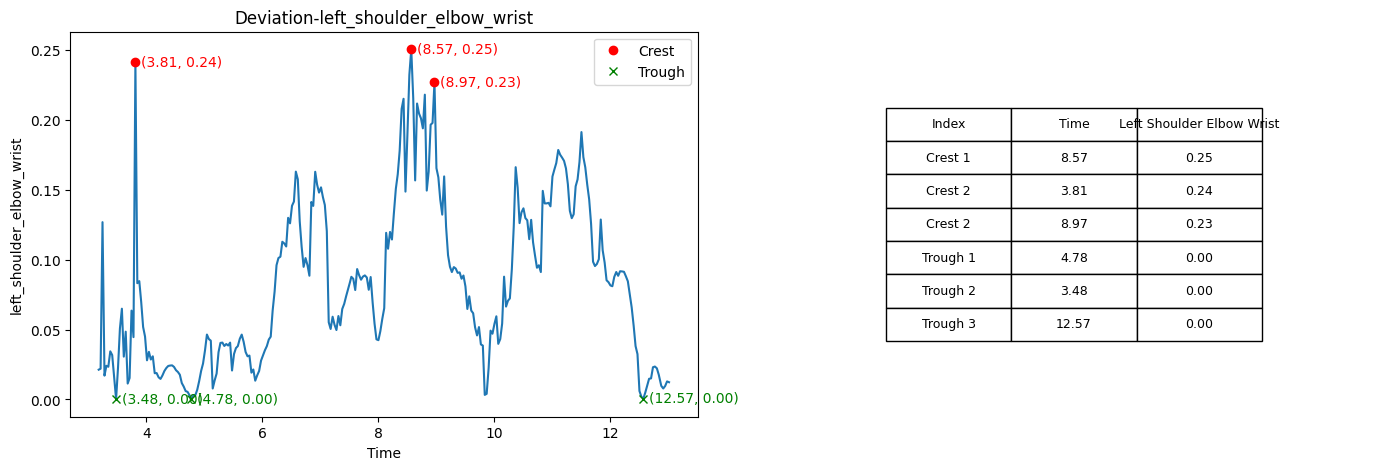

In [28]:
activities=['ClimbOnStool']
for s in ['S7']:
    for a in activities:
        diff(sub=s,activity=a,cam='1',trial='1')
        plot(sub=s,activity=a,cam='1',trial='1')